In [1]:
#Create Anomalous examples

In [1]:
import numpy
import helpers as helpers
import matplotlib.pyplot as plt


Using TensorFlow backend.


(389, 170, 360)
(170, 360)


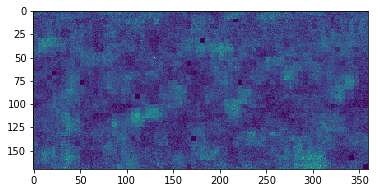

In [2]:
data_sample=helpers.get_data("ECAL_rechit_occ_time_276528.hdf5",data_type='good')
print(data_sample.shape)
input_image=data_sample[0,:]
#print(input_image[0,:])
print(input_image.shape)

im=plt.imshow(input_image)
plt.show()
plt.clf()


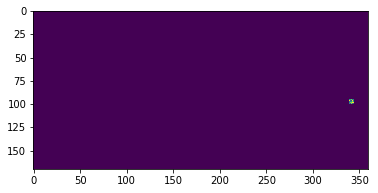

In [5]:
import random

height_range=range(0,input_image.shape[0],5)
width_range=range(0,input_image.shape[1],5)

y_cord=random.choice(height_range)#pick random y for a towers lower left point
x_cord=random.choice(width_range)#pick random x ---do---

for channel_y in range(y_cord,y_cord+5):
    for channel_x in range(x_cord,x_cord+5):
        input_image[channel_y,channel_x]*=1e5 #a very large number representing a hot tower

im2=plt.imshow(input_image)
plt.show()
    

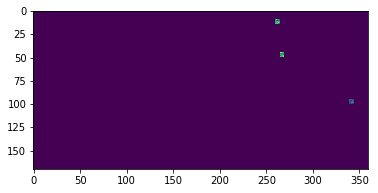

In [8]:
out_image=helpers.insert_hot_tower(input_image)
out_image=helpers.insert_hot_tower(out_image)

out_img=plt.imshow(out_image)
plt.show()

(39, 170, 360)


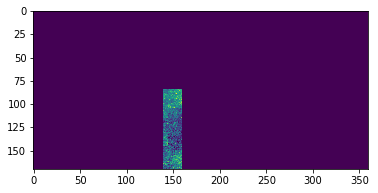

In [226]:

height_range=range(0,input_image.shape[0],85)
width_range=range(0,input_image.shape[1],20)

y_cord=random.choice(height_range)#pick random y for a module lower left point
x_cord=random.choice(width_range)#pick random x -----do------

for channel_y in range(y_cord,y_cord+85):
    for channel_x in range(x_cord,x_cord+20):
        input_image[channel_y,channel_x]=0 #0 occupancy, module is off for some reason
im2=plt.imshow(input_image)
plt.show()

(389, 170, 360)
(170, 360)


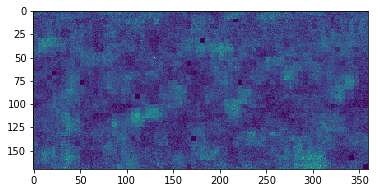

In [35]:
data_sample=helpers.get_data("ECAL_rechit_occ_time_276528.hdf5",data_type='good')
print(data_sample.shape)
input_image=data_sample[0,:]
#print(input_image[0,:])
print(input_image.shape)

im=plt.imshow(input_image)
plt.show()
plt.clf()

(389, 170, 360)


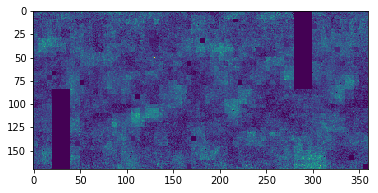

In [34]:
out_image=helpers.make_module_off(input_image)
#out_image=helpers.make_module_off(out_image)

out_img=plt.imshow(out_image)
plt.show()

In [36]:
#trial creating anomalous set (see create_anomalous.py for the final code)

import h5py
import numpy as np
def clean_name(hist_name):
    return hist_name.replace('/','_').replace(' ','_')
run=276528
hist_list=['EBOccupancyTask/EBOT rec hit occupancy','EBTimingTask/EBTMT timing map','EEOccupancyTask/EEOT rec hit occupancy EE -',
'EETimingTask/EETMT timing map EE -','EEOccupancyTask/EEOT rec hit occupancy EE +','EETimingTask/EETMT timing map EE +']
X={}
for hist_name in hist_list:
    data_sample=helpers.get_data("ECAL_rechit_occ_time_"+str(run)+".hdf5",data_type='good',group=clean_name(hist_name))
    
    for lumisec in range(len(data_sample)):
        if lumisec%10!=0:continue
        out_sample=helpers.insert_hot_tower(input_image)

        out_sample=np.reshape(out_sample,(1,out_sample.shape[0],out_sample.shape[1]))
        
        if clean_name(hist_name) not in X.keys():
            X[clean_name(hist_name)]=out_sample
        else:       
            #print ('not creating but adding')
            X[clean_name(hist_name)] = np.concatenate((X[clean_name(hist_name)],out_sample))
        
h = h5py.File('../data_maxnorm/bad_2016/ECAL_rechit_occ_time_'+str(run)+'.hdf5','w')
#[h.create_dataset(name, data=data, compression='lzf') for (name, data) in X.iteritems()] # for Python2.x                                                  
[h.create_dataset(name, data=data, compression='lzf') for (name, data) in X.items()] # for Python3.x         
    
print(X['EBOccupancyTask_EBOT_rec_hit_occupancy'].shape)

(39, 170, 360)
